
# Project: Investigate a Dataset - [DATABASE_NCIS_And_CENSUS_DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
   This database provides information on the number of gun licenses allocated to each state and the number of sales of each type of weapon on the one hand, and on the population statistics of each state on the other in United States of America, leaves to make a study of a possible relationship existing between the two parties. In the first dataset we have as columns the list of the 50 states of the USA and in the other we have as columns: state, permit, permit_recheck, handgun, long_gun, other,	multiple, admin, prepawn_handgun, ..., returned_other, rentals_handgun, rentals_long_gun, private_sale_handgun, private_sale_long_gun, private_sale_other, return_to_seller_handgun, return_to_seller_long_gun	return_to_seller_other, totals.


### Question(s) for Analysis
Quel est l'Etat qui a le plus vendu d'arme et en quel mois?
QUELLES SONT LES STATISTIQUES GENERALES EN 2016?
QUELS SONT LES ETAT QUI ONT LE NOMBRE MOYEN DE PERSONNE NOIRES ET LE NOMBRE D'ARMES VENDUES SUPERIEURS A LA MOYENNE DE TOUTE L'ANNEE 2016
QUEL EST L'ETAT QUI A LE PLUS GRAND NOMBRE MOYEN DE PERMIS DE PORT D'ARMES

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.7MB/s eta 0:00:01   24% |███████▉                        | 2.6MB 9.8MB/s eta 0:00:01    43% |██████████████                  | 4.6MB 11.6MB/s eta 0:00:01    56% |██████████████████▏             | 5.9MB 12.3MB/s eta 0:00:01    88% |████████████████████████████▍   | 9.3MB 12.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01  4% |█▌                              | 645kB 9.8MB/s eta 0:00:02    18% |██████                          | 2.5MB 13.8MB/s eta 0:00:01    32% |██████████▌                     | 4.4MB 8.8MB/s eta 0:00:02    36% |███████████▉                    | 4.9MB 12.8MB/s eta 0:00:01    40% |█████████████▏                  | 5.5MB 11.9MB/s eta 0:00:01    48% |███████████████▋                | 6.5MB 10.7MB/s eta 0:00:01    55% |█████████████████▉              | 7.5MB 19.4MB/s eta 0:00:01    60% |███████████████████▎            | 8.1MB 11.1MB/s eta 0:00:01    64% |████████████████████▋        

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun= pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx', parse_dates=['month'])
census= pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')
#dict_census_vars = {}
#for i in range(64): 
    #dict_census_vars[i] = census['Fact'][i]
    #print(i, census['Fact'][i])
#gun.head()
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%



# Data Cleaning
> Le nettoyage concerne la verifiaction des doublons , verifications et corrections des valeurs manquantes et la verification des formats de nos varaibles
 

## 1  DATA CLEANING DE GUN
#1 On commencera par nettoyer le dataset Gun , en eliminant les lignes qui ne sont pas importantes pour notre etude , nous ne laisserons que 'month', 'states', 'permit' et 'totals'


In [3]:
gun.drop(['permit_recheck','handgun','long_gun','other','multiple','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other','redemption_other'], axis=1, inplace=True)
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 4 columns):
month     12485 non-null datetime64[ns]
state     12485 non-null object
permit    12461 non-null float64
totals    12485 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 390.2+ KB


On remarque que la colonne 'permit' presente les valeurs nulles , donc on va remplacer les valeurs nulles par la moyenne de cette colonne , apres on verifiera avec la commande gun.info()

In [4]:
mean= gun['permit'].mean()
gun['permit'].fillna(mean, inplace=True)
gun.head()

,month,state,permit,totals
0,2017-09-01,Alabama,16717.0,32019
1,2017-09-01,Alaska,209.0,6303
2,2017-09-01,Arizona,5069.0,28394
3,2017-09-01,Arkansas,2935.0,17747
4,2017-09-01,California,57839.0,123506


#2 Ensuite , on verifie la redondance des lignes, on remarque donc quil n'y a pas de lignes dupliquees

In [5]:
sum(gun.duplicated())

0

#3 Enfin on verifie le format de nos donnees
On remarque notre colonne 'permit'est en decimal pourtant il doit etre en entier parce le nombre des permis ne peuvent qu'etre des entiers

In [6]:
gun.dtypes

month     datetime64[ns]
state             object
permit           float64
totals             int64
dtype: object

In [7]:
gun['permit']=gun['permit'].astype(int)
gun.dtypes

month     datetime64[ns]
state             object
permit             int64
totals             int64
dtype: object

   ## Le DATA CLEANING DE CENSUS

Pour la cas du dataset Census on doit le transposer pour une meilleure lecture

In [8]:
#On va transposer le dataset Census pour une meilleure lecture
census= census.T
census.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#on exporte temps dans un dataset quon cree puis on le recharge pour le mettre au bon format
census.to_csv('data.csv', index=True)
census_T= pd.read_csv('data.csv', header=1)
census_T.drop(0, inplace=True)
census_T.head()
census_T.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,Unnamed: 76,Value Flags,-,D,F,FN,Unnamed: 82,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#On va supprimer les colonnes inutiles
census_T.drop(census_T.columns[15:], axis=1, inplace=True)
census_T.drop(census_T.columns[2:5], axis=1, inplace=True)
census_T.drop(census_T.columns[3], axis=1, inplace=True)
census_T.drop(census_T.columns[4], axis=1, inplace=True)
census_T.drop(census_T.columns[5], axis=1, inplace=True)
census_T.drop(census_T.columns[6:8], axis=1, inplace=True)
census_T.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)"
1,Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,26.80%
2,Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,3.80%
3,Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,4.90%
4,Arkansas,"2,988,248",6.40%,23.60%,16.30%,50.90%,15.70%
5,California,"39,250,017",6.30%,23.20%,13.60%,50.30%,6.50%


In [11]:
#On va renommer nos colonnes
census_T=census_T.rename(columns = {'Fact':'state', 'Population estimates, July 1, 2016,  (V2016)' : 'Pop_est', 'Persons under 5 years, percent, July 1, 2016,  (V2016)':'Under_5years_%','Persons under 18 years, percent, July 1, 2016,  (V2016)':'Under_18years_%','Persons 65 years and over, percent,  July 1, 2016,  (V2016)':'Over_65years_%','Female persons, percent,  July 1, 2016,  (V2016)':'Female_%','Black or African American alone, percent, July 1, 2016,  (V2016)':'Black_African_alone_%'})
census_T.head(30)


,state,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
1,Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,26.80%
2,Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,3.80%
3,Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,4.90%
4,Arkansas,"2,988,248",6.40%,23.60%,16.30%,50.90%,15.70%
5,California,"39,250,017",6.30%,23.20%,13.60%,50.30%,6.50%
6,Colorado,"5,540,545",6.10%,22.80%,13.40%,49.70%,4.50%
7,Connecticut,"3,576,452",5.20%,21.10%,16.10%,51.20%,11.80%
8,Delaware,"952,065",5.80%,21.50%,17.50%,51.60%,22.60%
9,Florida,"20,612,439",5.50%,20.10%,19.90%,51.10%,16.80%
10,Georgia,"10,310,371",6.40%,24.40%,13.10%,51.30%,32.00%


La maintenant , nous avons choisis 6 colonnes sur lesquelles notre etude va porter, 
La premiere etape est de verifier sil ya les valeurs manquantes dans nos colonnes et de les corriges

In [12]:
census_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
state                    50 non-null object
Pop_est                  50 non-null object
Under_5years_%           50 non-null object
Under_18years_%          50 non-null object
Over_65years_%           50 non-null object
Female_%                 50 non-null object
Black_African_alone_%    50 non-null object
dtypes: object(7)
memory usage: 3.1+ KB


On constate quil n'y a pas de valeures manquantes, nous passerons maintenant a la verification des doublons

In [13]:
sum(census_T.duplicated())

0

On constate egalement qu'il n'y pas de doublons, on passe maintenant a la verification et correction du formats de donnees

In [14]:
census_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
state                    50 non-null object
Pop_est                  50 non-null object
Under_5years_%           50 non-null object
Under_18years_%          50 non-null object
Over_65years_%           50 non-null object
Female_%                 50 non-null object
Black_African_alone_%    50 non-null object
dtypes: object(7)
memory usage: 3.1+ KB


In [15]:
#On convertit toutes les colonnes en  numeriques
census_T['Pop_est'] = census_T['Pop_est'].str.replace(',', '').astype(int)
census_T['Under_5years_%'] = census_T['Under_5years_%'].str.rstrip('%').astype('float')
census_T['Under_18years_%'] = census_T['Under_18years_%'].str.rstrip('%').astype('float')
census_T['Over_65years_%'] = census_T['Over_65years_%'].str.rstrip('%').astype('float')
census_T['Female_%'] = census_T['Female_%'].str.rstrip('%').astype('float')
census_T['Black_African_alone_%'] = census_T['Black_African_alone_%'].str.rstrip('%').astype('float')
census_T.head()

,state,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
1,Alabama,4863300,6.0,22.6,16.1,51.6,26.8
2,Alaska,741894,7.3,25.2,10.4,47.7,3.8
3,Arizona,6931071,6.3,23.5,16.9,50.3,4.9
4,Arkansas,2988248,6.4,23.6,16.3,50.9,15.7
5,California,39250017,6.3,23.2,13.6,50.3,6.5


In [16]:
#On verifie et on constate que les donnes sont au bon format maintenat
census_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
state                    50 non-null object
Pop_est                  50 non-null int64
Under_5years_%           50 non-null float64
Under_18years_%          50 non-null float64
Over_65years_%           50 non-null float64
Female_%                 50 non-null float64
Black_African_alone_%    50 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ KB


In [17]:
#on verifie qu'on a le meme nombre de valeur unique dans gun et census
gun['state'].nunique()

55

In [18]:
census_T.nunique()

state                    50
Pop_est                  50
Under_5years_%           29
Under_18years_%          43
Over_65years_%           39
Female_%                 27
Black_African_alone_%    46
dtype: int64

On constate que 'Fact'=50 dans census et 'State'=55 dans gun ne sont pas les meme donc il va falloir corriger en supprimer les lignes de 'State' qui ne sont pas des villes

In [19]:
liste=[]
for n in census_T['state']:
   liste.append(n)
#liste

In [20]:
liste1=[]
for i in gun['state'] :
    if i not in liste:
        if i not in liste1:
            liste1.append(i)
liste1

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

In [21]:
#on supprime ces lignes de gun state qui contiennent ces 5 elements
gun.drop(gun[gun['state'].isin(liste1)].index,inplace=True)
'Guam' in list(gun['state'])

False

In [22]:
census_T.head()

,state,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
1,Alabama,4863300,6.0,22.6,16.1,51.6,26.8
2,Alaska,741894,7.3,25.2,10.4,47.7,3.8
3,Arizona,6931071,6.3,23.5,16.9,50.3,4.9
4,Arkansas,2988248,6.4,23.6,16.3,50.9,15.7
5,California,39250017,6.3,23.2,13.6,50.3,6.5


In [23]:
gun.head()

,month,state,permit,totals
0,2017-09-01,Alabama,16717,32019
1,2017-09-01,Alaska,209,6303
2,2017-09-01,Arizona,5069,28394
3,2017-09-01,Arkansas,2935,17747
4,2017-09-01,California,57839,123506


In [24]:
#On va fusionner nos deux dataset sur la colonne state 
fus= gun.merge(census_T, on='state', how='inner')
fus.head()

,month,state,permit,totals,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
0,2017-09-01,Alabama,16717,32019,4863300,6.0,22.6,16.1,51.6,26.8
1,2017-08-01,Alabama,19733,35038,4863300,6.0,22.6,16.1,51.6,26.8
2,2017-07-01,Alabama,18042,31474,4863300,6.0,22.6,16.1,51.6,26.8
3,2017-06-01,Alabama,19508,35687,4863300,6.0,22.6,16.1,51.6,26.8
4,2017-05-01,Alabama,18538,33331,4863300,6.0,22.6,16.1,51.6,26.8


In [25]:
#On delimite notre dataset a l'annee 2016
temps= fus.query('2016 <= month < 2017')
temps
#On sauvegarde dans un dataset fus_2016 et on le charge
temps.to_csv('fus_2016.csv', index=False)
fus_2016= pd.read_csv('fus_2016.csv')
fus_2016

,month,state,permit,totals,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
0,2016-12-01,Alabama,26996,62014,4863300,6.0,22.6,16.1,51.6,26.8
1,2016-11-01,Alabama,22628,50477,4863300,6.0,22.6,16.1,51.6,26.8
2,2016-10-01,Alabama,22979,43251,4863300,6.0,22.6,16.1,51.6,26.8
3,2016-09-01,Alabama,22014,41336,4863300,6.0,22.6,16.1,51.6,26.8
4,2016-08-01,Alabama,22987,42455,4863300,6.0,22.6,16.1,51.6,26.8
5,2016-07-01,Alabama,27765,48927,4863300,6.0,22.6,16.1,51.6,26.8
6,2016-06-01,Alabama,24802,44976,4863300,6.0,22.6,16.1,51.6,26.8
7,2016-05-01,Alabama,20092,36157,4863300,6.0,22.6,16.1,51.6,26.8
8,2016-04-01,Alabama,20959,41239,4863300,6.0,22.6,16.1,51.6,26.8
9,2016-03-01,Alabama,27829,55486,4863300,6.0,22.6,16.1,51.6,26.8


<a id='eda'></a>
## Exploratory Data Analysis


### Quel est l'Etat qui a le plus vendu d'arme et en quel mois?

In [26]:
#Pour cela on cherche d'abors a connaitre le max d'armes vendus en 1 mois dans tout le dataset
maxi=fus_2016['totals'].max()
maxi

397059

In [57]:
def plus_grand (n):
    if n== fus_2016['totals'].max():
        return fus_2016[fus_2016['totals']== maxi];
    else:
        print('c_est pas le plus grand nombre darmes vendus en un mois')
plus_grand(maxi)

,month,state,permit,totals,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
192,2016-12-01,Kentucky,358510,397059,4436974,6.2,22.8,15.6,50.7,8.3


L'on constate que c'est l'etat du Kentucky qui a le plus vendu d'arme au mois de decembre 2016

### QUELLES SONT LES STATISTIQUES GENERALES EN 2016?

In [28]:
fus_2016.describe()

,permit,totals,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
count,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000
mean,18556.246667,45675.915000,6.448927e+06,4.696780,17.425780,11.810440,38.511740,8.360900
std,45770.874659,59090.035722,7.204691e+06,2.672467,9.844481,6.784216,21.385361,9.826449
min,0.000000,1141.000000,5.855010e+05,0.052000,0.197000,0.145000,0.487000,0.020000
25%,1265.750000,11798.500000,1.831102e+06,4.800000,19.000000,10.400000,47.700000,0.600000
50%,4257.000000,27010.500000,4.559320e+06,6.000000,22.250000,15.000000,50.300000,4.700000
75%,17375.750000,51659.500000,7.288000e+06,6.400000,23.500000,16.100000,50.900000,12.600000
max,358510.000000,397059.000000,3.925002e+07,8.300000,30.200000,19.900000,51.600000,37.700000


On remarque donc qu'en 2016 , nous avons en moyenne  
-18556.246667 permis de port d'armes;  
-45675.915000 de total d'armes vendus  
-6.448927e+06 de population estimee  
-4.696780% de moins de 5 ans  
-17.425780% de moins de 18 ans  
-11.810440% d'au moins 65 ans  
-38.511740% de femmes  
-8.360900% de noirs americains

### QUELS SONT LES ETAT QUI ONT LE NOMBRE MOYEN DE PERSONNE NOIRES ET LE NOMBRE D'ARMES VENDUES SUPERIEURS A LA MOYENNE DE TOUTE L'ANNEE 2016

In [29]:
yo=fus_2016.groupby(['state']).mean()
yo.loc[(yo['Black_African_alone_%']>8.3609) & (yo['totals']> 45675.915000)]

,permit,totals,Pop_est,Under_5years_%,Under_18years_%,Over_65years_%,Female_%,Black_African_alone_%
state,,,,,,,,
Alabama,24253.250000,51412.250000,4863300.0,6.0,22.6,16.1,51.6,26.8
Florida,28090.500000,119611.666667,20612439.0,5.5,20.1,19.9,51.1,16.8
Georgia,19426.250000,51082.083333,10310371.0,6.4,24.4,13.1,51.3,32.0
Illinois,80244.166667,160339.166667,12801539.0,6.0,22.9,14.6,50.9,14.7
Indiana,78909.333333,119727.083333,6633053.0,6.4,23.8,14.9,50.7,9.7
Michigan,20930.166667,48300.416667,9928300.0,5.8,22.1,16.2,50.8,14.2
Missouri,7581.000000,52693.250000,6093000.0,6.1,22.8,16.1,50.9,11.8
Texas,32538.500000,143477.166667,27862596.0,7.2,26.2,12.0,50.4,12.6


Ces etats sont: Alabama, Florida, Georgia, Illinois, Indiana, Michigan, Missouri, et le Texas

### QUEL EST L'ETAT QUI A LE PLUS GRAND NOMBRE MOYEN DE PERMIS DE PORT D'ARMES

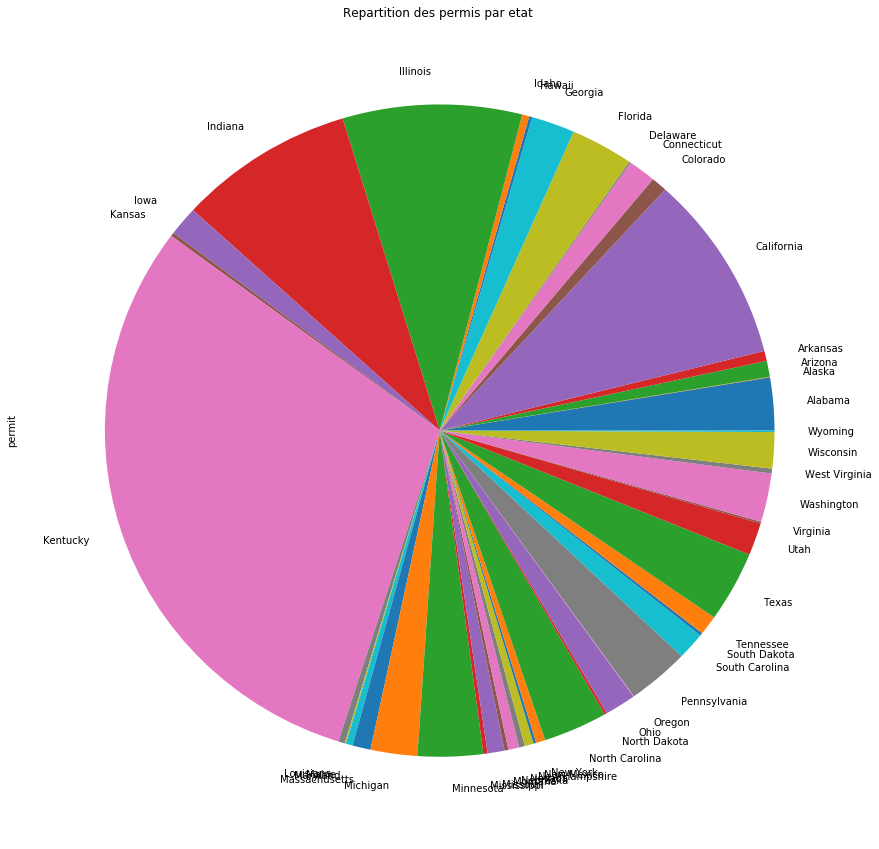

In [59]:
yo['permit'].plot(kind='pie', figsize=(15, 15), title='Repartition des permis par etat ')

Ce diagramme circulaire montre la distribution du permit dans chaque Etat, Il permet de représenter un petit nombre de valeurs par des angles proportionnels à la fréquence de ces valeurs. On voit que c'est le Kentucky qui a le plus grand nombre moyen de permis de port d'armes

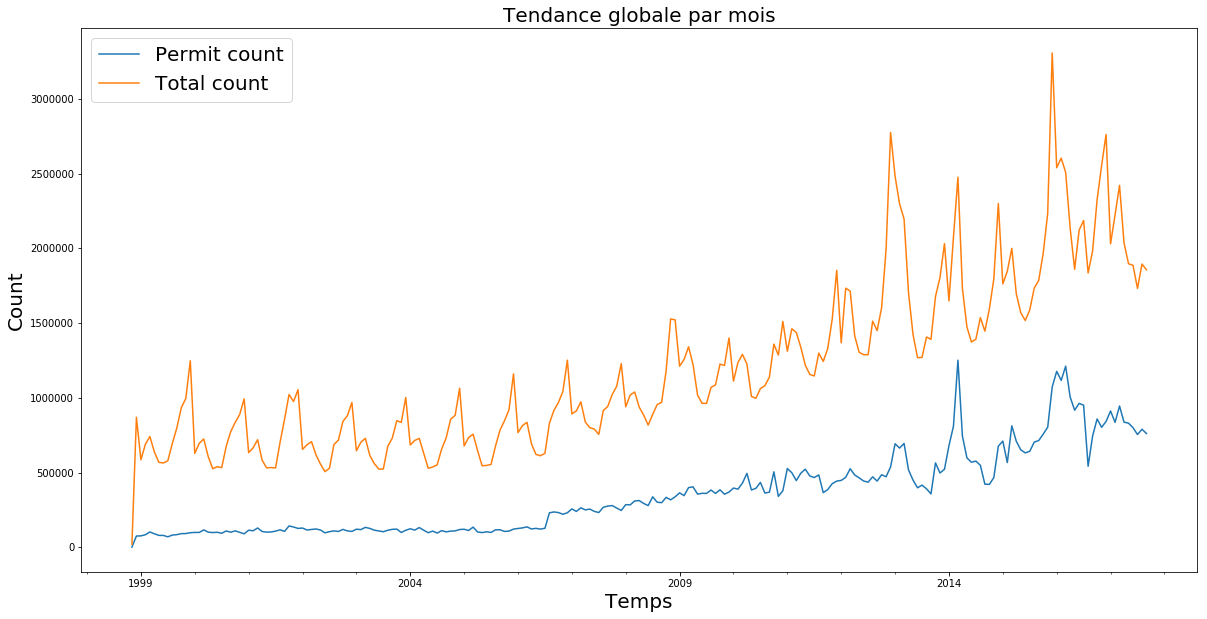

In [52]:
plt.figure(figsize=(20,10))
gun.groupby('month')['permit'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1),label = 'Permit count')
gun.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (3, 2),label = 'Total count')
plt.title('Tendance globale par mois',fontsize = 20)
plt.xlabel('Temps',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

D'après le graphique linéaire des ventes d'armes à feu par rapport aux années 1997 à 2016, il y a une tendance à la hausse des achats d'armes à feu avec des augmentations soudaines en 2015 et une diminution en 2016, en partie due à la collecte de données de seulement 9 mois cette année-là.

<a id='conclusions'></a>
## Conclusions

Arrivé au terme de notre analyse, nous avons nettoye et prepare nos donnees pour repondre aux questions posees. Il en resort clairement que l'etat qui a plus vendu d'arme au cours d'un mois n'a pas forcement un nombre eleve de pourcentage d'hommes de couleurs, on a vu les statistiques moyennes des 50 etats au cours de l'année 2016 et enfin la liste des etats qui ont un nombre myen de vente d'armes et de noirs africains superieur a la moyenne. Toutefois ces recherches auraient ete plus interessant si on vait les statistiques de le population sur plusieurs annees consecutives pour avoir des resulats plus larges et aussi si la date etait plus precise avec les differents jours de chaque mois pour une precision accrue.  
Une des limitations est qu'il ya les valeurs manquantes ou nan dans l'ensemble de données qui pourraient affecter notre compréhension des informations à long terme d'une variable particulière.
## Submitting your Project 

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0